## Regression Modelling Project
##                                           Vinay Sirohi

### Importing the useful libraries

In [53]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn.linear_model import *
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

## Step 1: Reading and Understanding the Data

In [36]:
housing = pd.read_csv('Housing.csv')
Y = housing['price']
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
housing.shape

(545, 13)

In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


## Step 2: Visualising the Data

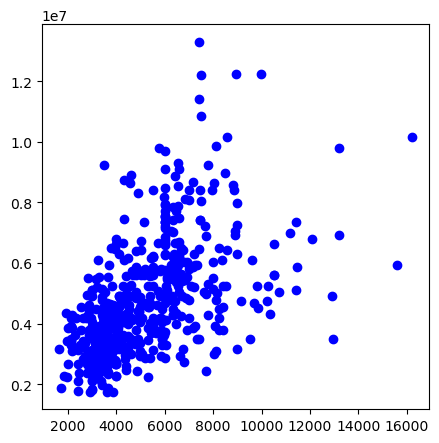

In [15]:
plt.figure(figsize=[5,5])
plt.scatter(housing.area, housing.price , color = 'blue')
plt.show()


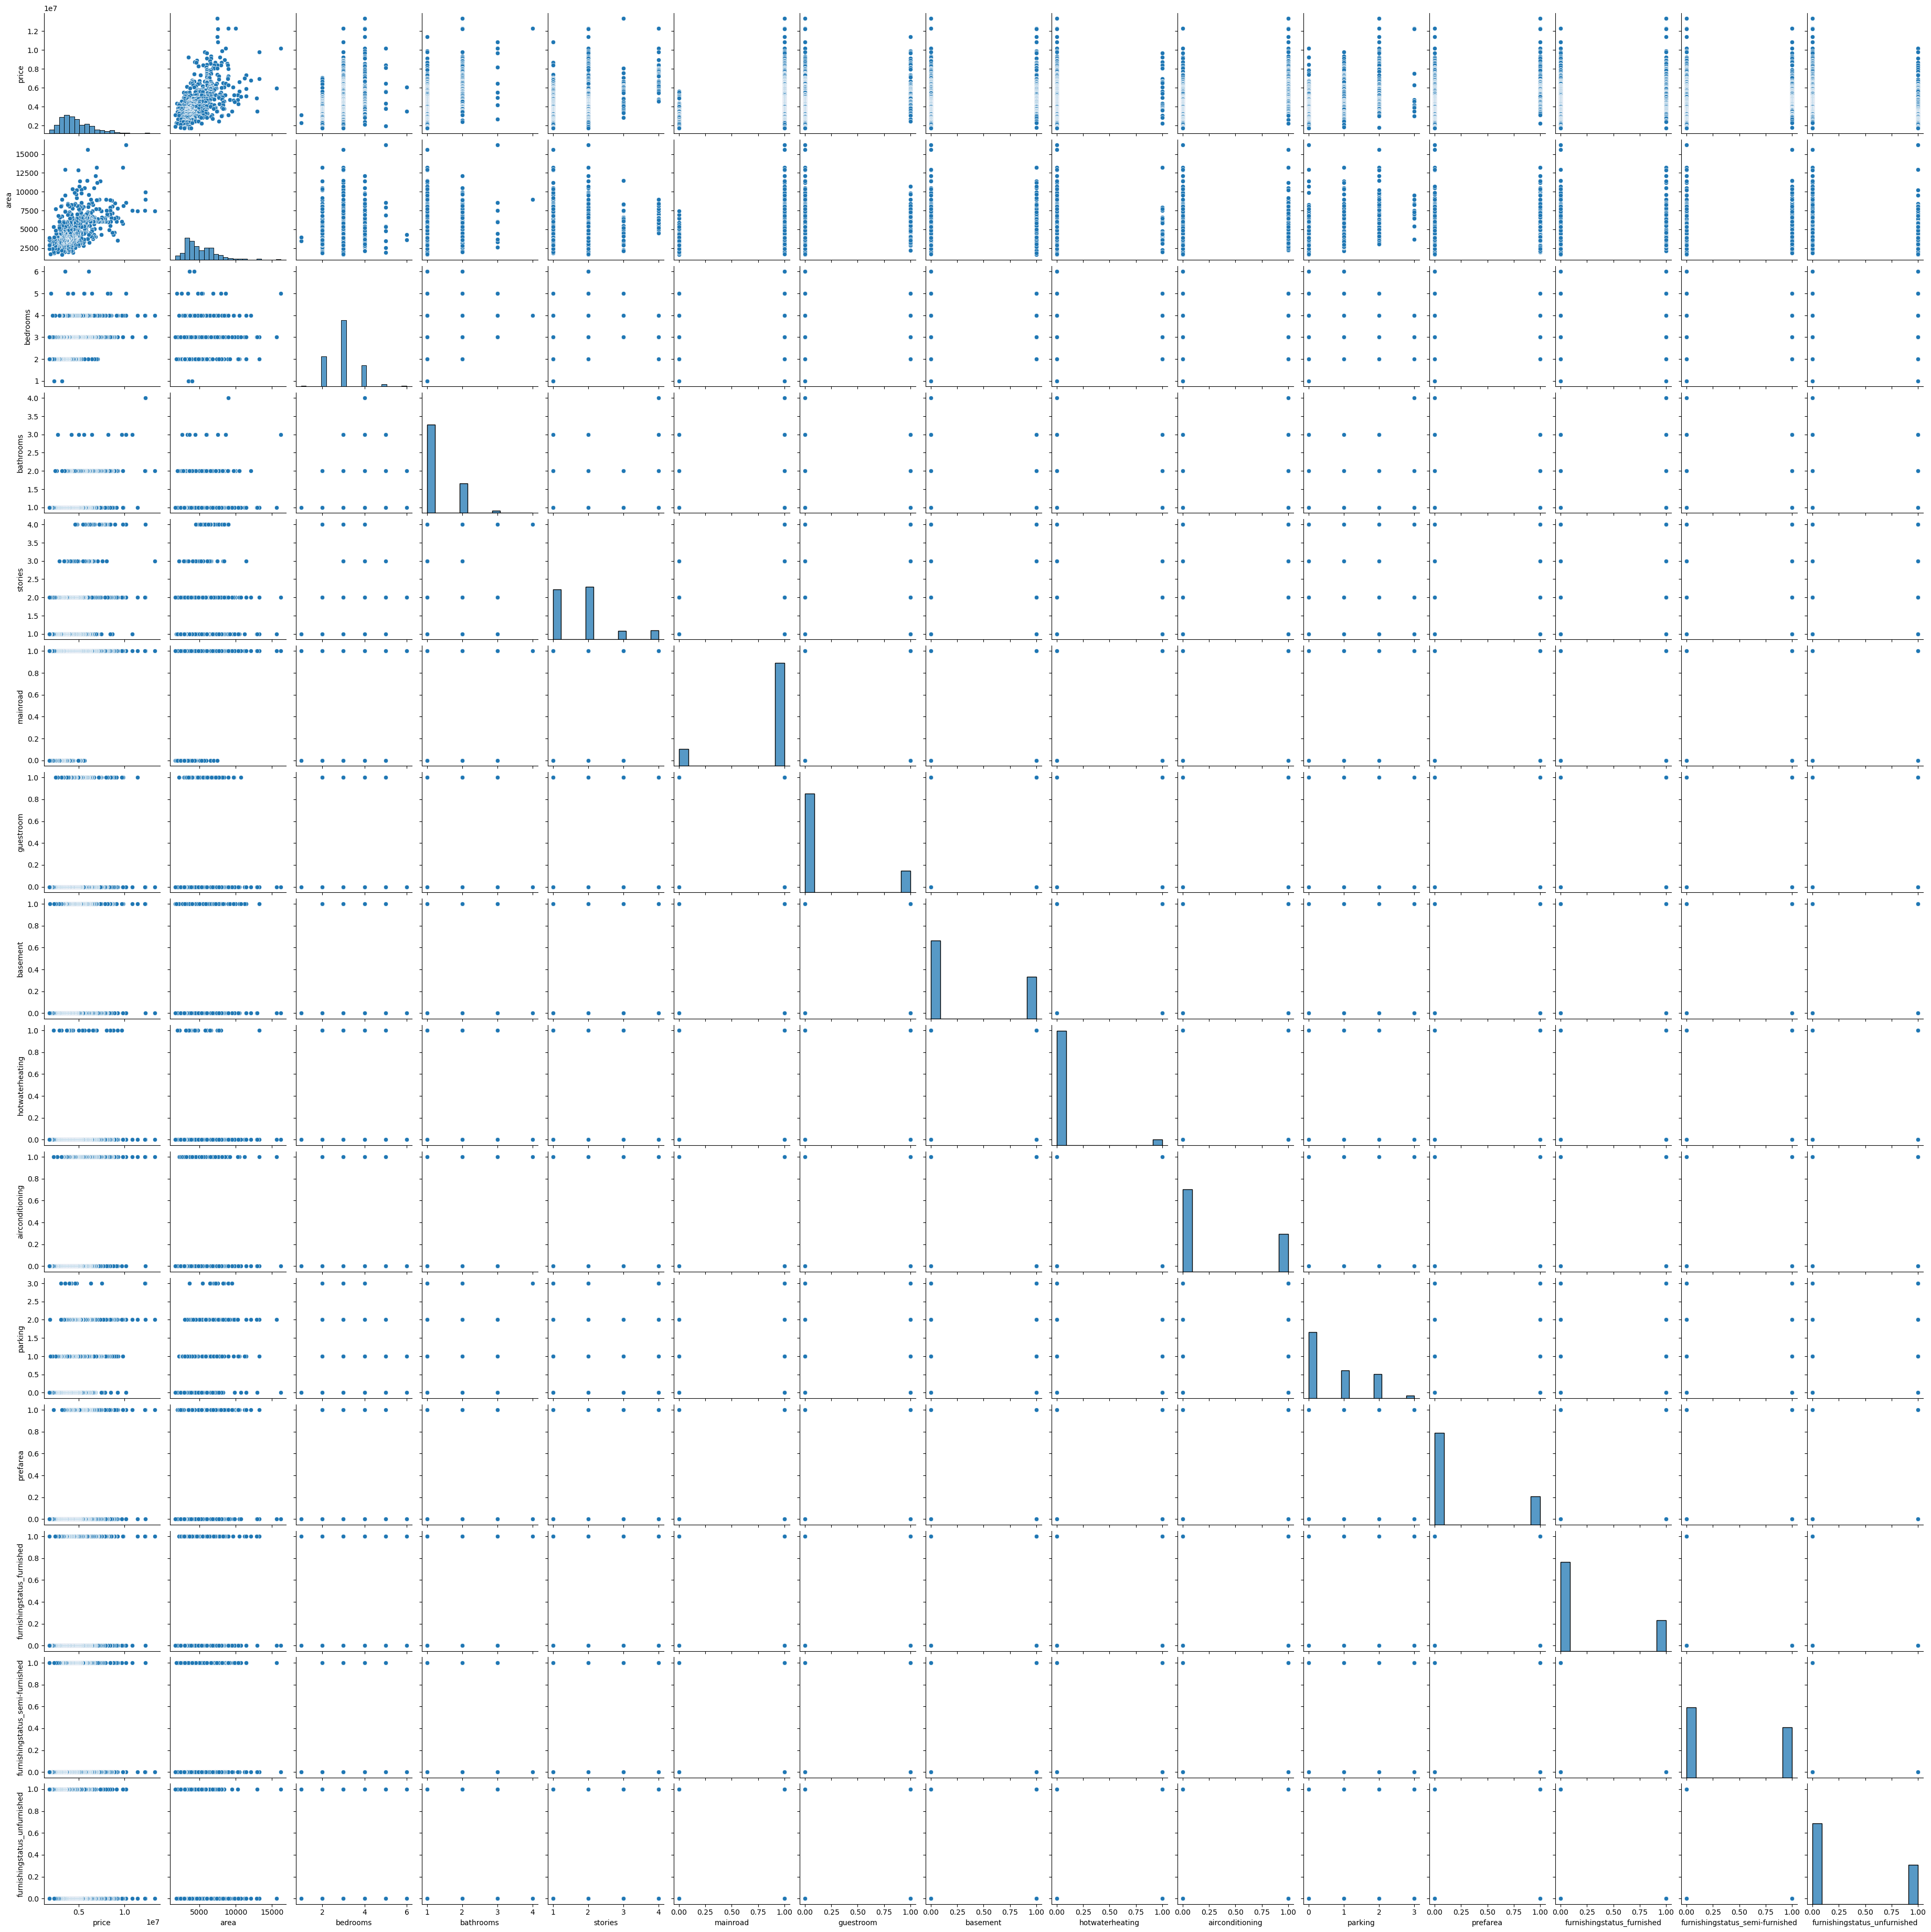

In [18]:
sns.pairplot(housing)
plt.show()


## Step 3: Data Preparation

### We can see that your dataset has many columns with values as 'Yes' or 'No'.

### But in order to fit a regression line, we would need numerical values and not string. Hence, we need to convert them to 1s and 0s, where 1 is a 'Yes' and 0 is a 'No'.

In [37]:

housing = housing.drop(['price'] , axis = 1)
housing.columns

Index(['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea',
       'furnishingstatus'],
      dtype='object')

In [38]:
labelencoder = LabelEncoder()
housing['mainroad']=labelencoder.fit_transform(housing['mainroad'])
housing['guestroom']=labelencoder.fit_transform(housing['guestroom'])
housing['basement']=labelencoder.fit_transform(housing['basement'])
housing['hotwaterheating']=labelencoder.fit_transform(housing['hotwaterheating'])
housing['airconditioning']=labelencoder.fit_transform(housing['airconditioning'])
housing['prefarea']=labelencoder.fit_transform(housing['prefarea'])
housing

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,7420,4,1,2,1,1,1,0,1,2,0,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,1,0,1,0,0,2,0,unfurnished
541,2400,3,1,1,0,0,0,0,0,0,0,semi-furnished
542,3620,2,1,1,1,0,0,0,0,0,0,unfurnished
543,2910,3,1,1,0,0,0,0,0,0,0,furnished


## Step 4: Dummy Variables
The variable furnishingstatus has three levels. We need to convert these levels into integer as well.

In [39]:
housing = pd.get_dummies(housing)
housing.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,7420,4,2,3,1,0,0,0,1,2,1,1,0,0
1,8960,4,4,4,1,0,0,0,1,3,0,1,0,0
2,9960,3,2,2,1,0,1,0,0,2,1,0,1,0
3,7500,4,2,2,1,0,1,0,1,3,1,1,0,0
4,7420,4,1,2,1,1,1,0,1,2,0,1,0,0


## Step 5 : Data Reduction (PCA)

In [40]:
X=housing.values
pca = PCA(n_components=3)
pca.fit(X)
x_pca = pca.transform(X)

In [41]:
X_pca.shape

(545, 3)

In [42]:
X.shape

(545, 14)

In [43]:
x_pca = np.array(x_pca)
x_pca = pd.DataFrame(x_pca)
x_pca

,0,1,2
0,2269.459083,1.835640,0.707584
1,3809.459274,3.093211,1.255488
2,4809.458888,0.044632,0.697368
3,2349.459198,1.202937,1.995208
4,2269.458994,0.794196,1.007844
...,...,...,...
540,-2150.541200,-0.906447,1.644012
541,-2750.541443,-0.558732,-0.098810
542,-1530.541501,-1.289269,-0.425729
543,-2240.541423,-0.567077,-0.181338


In [44]:
X = x_pca 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = .2, random_state = 2)

## Step 6 : Fitting the Model

In [47]:
model = LinearRegression()
model.fit(X,Y)
LinearRegression(copy_X = True , fit_intercept = True , n_jobs = None , normalize = False)
linear= LinearRegression()
linear.fit(X_train , Y_train)
YPrediction = linear.predict(X_test)
print("predicted price:")
print(YPrediction)
print("\nTEST DATASET:")
print(X_test)

predicted price:
[3739254.12965941 4894846.43035016 2842162.15279185 3362571.43776515
 5598187.98532506 4661413.62945954 3668682.44636821 3713912.97326004
 3676655.8851768  4522160.88407295 4310914.13814615 3281836.59326896
 4419001.62178574 4251758.25906471 5219698.50786662 6194840.2808073
 5972001.23798241 4259536.59378434 2755261.34611624 4495396.90254245
 4503405.28819219 3476476.43710833 4904178.18104572 5405119.0727379
 2485068.07313463 3123968.02785855 2917133.26501654 4998799.67456332
 6491130.98742073 3589705.76005801 4038003.56930592 3143356.049228
 3721706.72888558 5764204.16957742 5299221.24451104 6638316.56230053
 2939795.3560062  5757154.75639454 5363211.86724189 3700144.31639143
 8182268.24904689 4081509.819966   2893418.71949585 4736366.0534754
 4202576.69371738 3940331.43605436 3493007.66032168 3027186.59032239
 4413358.5431351  5099963.7998381  9613321.08901324 5516183.56549746
 3065378.02674497 2917133.26501654 5028269.92122117 5720884.24372324
 5603176.58028538 4147

In [55]:
r2_score = linear.score(X_test,Y_test)
print(r2_score*100,'%')

56.56260204991447 %
